# Plotting oscillation amplitude vs. PLTp

Hi! Welcome :) This code was originally created by Marilena Lykiardopoulou and was automated and commented by Annabelle Czihaly. 
 The goal of this script is to plot time of flight (ToF) vs. time offset for various capture times. We then fit these curves to determine the oscillation amplitude. Finally, we plot the oscillation amplitude vs. capture time. Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import optimize

#### define tof resonance

In [2]:
def tof_res(df): 

    ToF = []
    counts = []
    x = []
    sigma = []
    time_offset = []
    
    for i in range(0, max(df['x_step_idx'])+1): # for i in range 0 to the max value in x_step_idx col (inclusive)
        
        df_i = df.loc[df['x_step_idx']==i] # df_i is a new dataframe that has all rows where the value in df['x_step_idx'] is equal to i
        
        ToF.append(np.average(df_i['tof'])) 
        sigma.append(np.std(df_i['tof']))
        x.append(i) # i is just scan point
        counts.append(len(df_i['tof']))
        
        time_offset.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].str.split(',').str[0]]))
        
    return ToF, sigma, x, counts, time_offset

#### define sine function 

In [3]:
def sine(x, a, b, c, d):
    return a * np.sin(b * (x+d)) + c

#### load in data set, fit to a sine curve, plot: data, guess fit, and fit

[  1.90103062 839.10110475  93.88727477 -10.00950832]


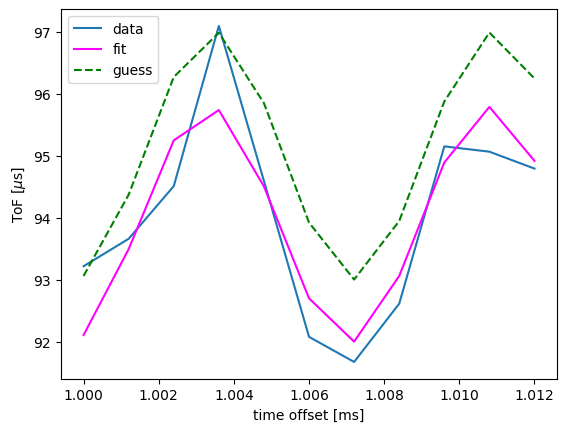

In [4]:
df_1 = pd.read_csv("run44332.csv") #PLTp = 2166V

ToF_1, sigma_1, x_1, counts_1, time_offset_1 = tof_res(df_1)

time_offset_1 = np.array(time_offset_1)

guess_1 = [2, 840, 95, -10] 
params_1, params_covariance_1 = optimize.curve_fit(sine, time_offset_1, ToF_1, guess_1)

print(params_1)
error_1 = np.sqrt(np.diag(params_covariance_1))

#---------------------------plot

plt.plot(time_offset_1, ToF_1, label='data')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(time_offset_1, sine(time_offset_1, params_1[0], params_1[1], params_1[2], params_1[3]), label='fit', color='fuchsia')
plt.plot(time_offset_1, sine(time_offset_1, guess_1[0], guess_1[1], guess_1[2], guess_1[3]), label='guess', color='green', linestyle='dashed')

plt.xlabel('time offset [ms]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)

[   1.33418574 1000.66939128   95.1027083    -8.26800313]


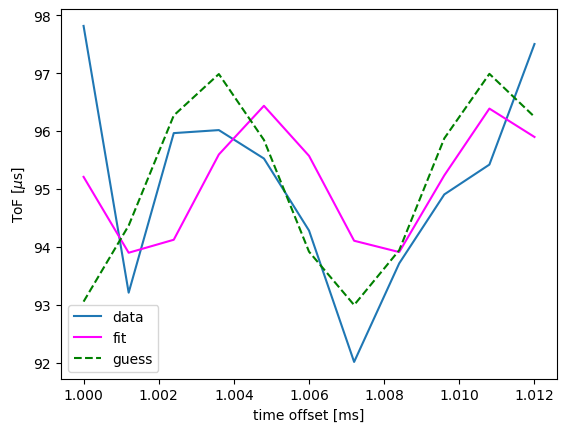

In [5]:
df_2 = pd.read_csv("run44333.csv") #PLTp = 2168V
#df_2 = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF_2, sigma_2, x_2, counts_2, time_offset_2 = tof_res(df_2)

time_offset_2 = np.array(time_offset_2)

guess_2 = [2, 840, 95, -10]
params_2, params_covariance_2 = optimize.curve_fit(sine, time_offset_2, ToF_2, guess_2)

print(params_2)
error_2 = np.sqrt(np.diag(params_covariance_2))

#---------------------------plot

plt.plot(time_offset_2, ToF_2, label='data')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(time_offset_2, sine(time_offset_2, params_2[0], params_2[1], params_2[2], params_2[3]), label='fit', color='fuchsia')
plt.plot(time_offset_2, sine(time_offset_2, guess_2[0], guess_2[1], guess_2[2], guess_2[3]), label='guess', color='green', linestyle='dashed')

plt.xlabel('time offset [ms]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)

[-7.17438626e-01  7.39113648e+02  9.49439437e+01  2.00281997e+00]


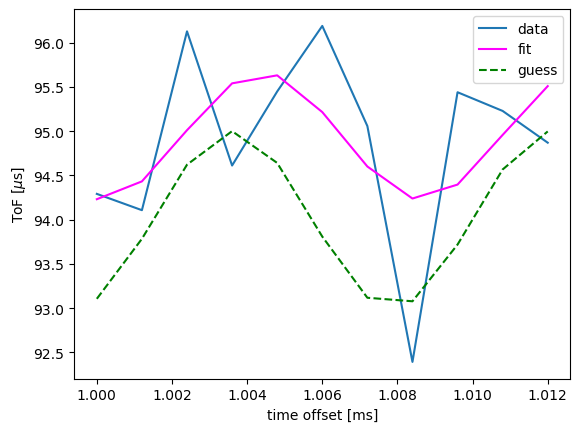

In [6]:
df_3 = pd.read_csv("run44334.csv") #PLTp = 2170V
#df_3 = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF_3, sigma_3, x_3, counts_3, time_offset_3 = tof_res(df_3)

time_offset_3 = np.array(time_offset_3)

# amplitude, frequency, off set, phase
guess_3 = [-1, 740, 94, 2]
params_3, params_covariance_3 = optimize.curve_fit(sine, time_offset_3, ToF_3, guess_3)

print(params_3)
error_3 = np.sqrt(np.diag(params_covariance_3))

#---------------------------plot

plt.plot(time_offset_3, ToF_3, label='data')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(time_offset_3, sine(time_offset_3, params_3[0], params_3[1], params_3[2], params_3[3]), label='fit', color='fuchsia')
plt.plot(time_offset_3, sine(time_offset_3, guess_3[0], guess_3[1], guess_3[2], guess_3[3]), label='guess', color='green', linestyle='dashed')

plt.xlabel('time offset [ms]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)

[  2.23043042 846.56294285  93.87228985   2.18351027]


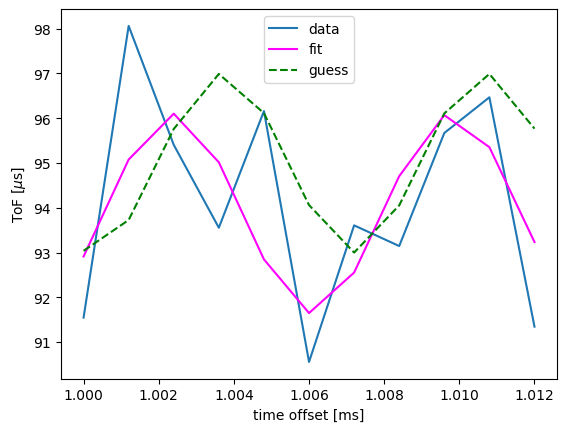

In [7]:
df_4 = pd.read_csv("run44335.csv") #PLTp = 2172V
#df_4 = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF_4, sigma_4, x_4, counts_4, time_offset_4 = tof_res(df_4)

time_offset_4 = np.array(time_offset_4)

# amplitude, frequency, off set, phase
guess_4 = [2, 900, 95, 2]
params_4, params_covariance_4 = optimize.curve_fit(sine, time_offset_4, ToF_4, guess_4)

print(params_4)
error_4 = np.sqrt(np.diag(params_covariance_4))

#---------------------------plot

plt.plot(time_offset_4, ToF_4, label='data')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(time_offset_4, sine(time_offset_4, params_4[0], params_4[1], params_4[2], params_4[3]), label='fit', color='fuchsia')
plt.plot(time_offset_4, sine(time_offset_4, guess_4[0], guess_4[1], guess_4[2], guess_4[3]), label='guess', color='green', linestyle='dashed')

plt.xlabel('time offset [ms]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)

[ -6.98389705 699.05165474  94.07253958   2.98567707]


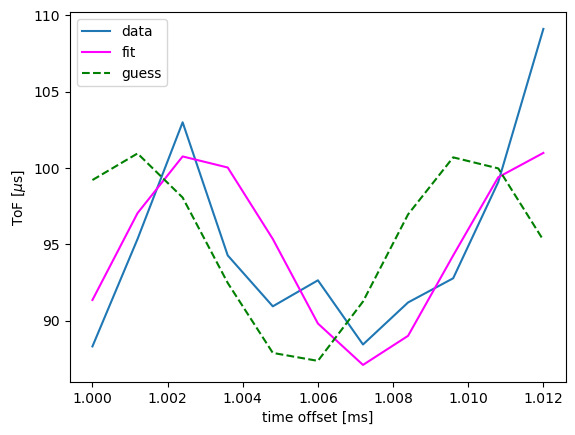

In [8]:
df_5 = pd.read_csv("run44336.csv") #PLTp = 2174V
#df_5 = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF_5, sigma_5, x_5, counts_5, time_offset_5 = tof_res(df_5)

time_offset_5 = np.array(time_offset_5)

# amplitude, frequency, off set, phase
guess_5 = [-7, 700, 94, 3]
params_5, params_covariance_5 = optimize.curve_fit(sine, time_offset_5, ToF_5, guess_5)

print(params_5)
error_5 = np.sqrt(np.diag(params_covariance_5))

#---------------------------plot

plt.plot(time_offset_5, ToF_5, label='data')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(time_offset_5, sine(time_offset_5, params_5[0], params_5[1], params_5[2], params_5[3]), label='fit', color='fuchsia')
plt.plot(time_offset_5, sine(time_offset_5, guess_5[0], guess_5[1], guess_5[2], guess_5[3]), label='guess', color='green', linestyle='dashed')

plt.xlabel('time offset [ms]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)

[  2.52566071 851.80672253  94.39185148   1.99275274]


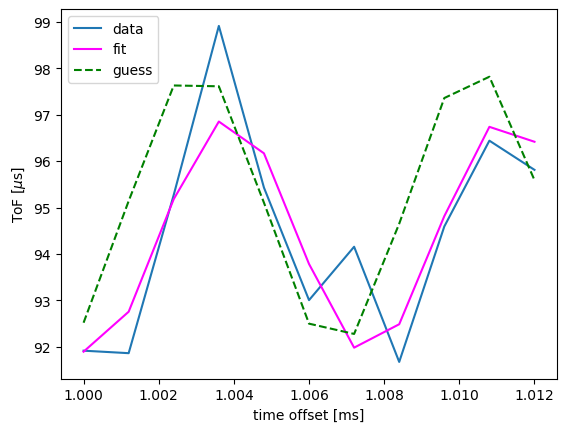

In [9]:
df_6 = pd.read_csv("run44331.csv") #PLTp = 2164V
#df_6 = df.loc[df['tof']<=130] #apply tof cut to dateframe

ToF_6, sigma_6, x_6, counts_6, time_offset_6 = tof_res(df_6)

time_offset_6 = np.array(time_offset_6)

# amplitude, frequency, off set, phase
guess_6 = [3, 850, 95, 2]
params_6, params_covariance_6 = optimize.curve_fit(sine, time_offset_6, ToF_6, guess_6)

print(params_6)
error_6 = np.sqrt(np.diag(params_covariance_6))

#---------------------------plot

plt.plot(time_offset_6, ToF_6, label='data')

# note: the data isn't sinusoidal but the fit helps us determine the v_rf of the lowest ToF(s)
plt.plot(time_offset_6, sine(time_offset_6, params_6[0], params_6[1], params_6[2], params_6[3]), label='fit', color='fuchsia')
plt.plot(time_offset_6, sine(time_offset_6, guess_6[0], guess_6[1], guess_6[2], guess_6[3]), label='guess', color='green', linestyle='dashed')

plt.xlabel('time offset [ms]')
plt.ylabel('ToF [$\mu$s]')

plt.legend(loc='best')
#plt.savefig('run45387.png', dpi = 200)

#### plot abs. value of oscillation amplitude vs. PLTp voltage

Text(0.5, 1.0, 'oscillation amplitude vs. PLTp voltage')

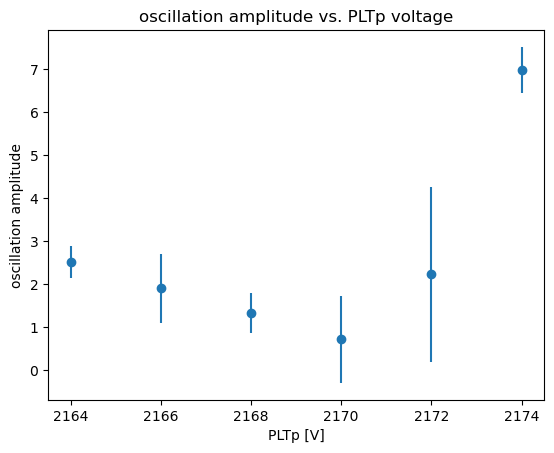

In [10]:
oscillation_amp = [np.abs(params_6[0]), np.abs(params_1[0]), np.abs(params_2[0]), np.abs(params_3[0]), np.abs(params_4[0]), np.abs(params_5[0])]
errors = [error_1[0], error_2[0], error_3[0], error_4[0], error_5[0], error_6[0]]

PLTp = [2164, 2166, 2168, 2170, 2172, 2174]

plt.errorbar(PLTp, oscillation_amp, errors, marker='o', ls='none')
plt.xlabel('PLTp [V]')
plt.ylabel('oscillation amplitude')
plt.title('oscillation amplitude vs. PLTp voltage')